In [92]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from random import randrange
from matplotlib import pyplot as plt

In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
x_train = x_train / 255.
x_test = x_test / 255.

In [32]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [33]:
x_train = x_train.T
x_test = x_test.T

In [34]:
x_train.shape

(784, 60000)

In [96]:
x_test.shape

(784, 10000)

In [10]:
def init_params():
    W1 = np.random.normal(size=(25, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(25, 1)) * np.sqrt(1./(784))
    W2 = np.random.normal(size=(15, 25)) * np.sqrt(1./(25))
    b2 = np.random.normal(size=(15, 1)) * np.sqrt(1./(25))
    W3 = np.random.normal(size=(10, 15)) * np.sqrt(1./(15))
    b3 = np.random.normal(size=(10, 1)) * np.sqrt(1./(15))
    return W1, b1, W2, b2, W3, b3

In [11]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [12]:
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))  

In [13]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [14]:
def ReLU_deriv(Z):
    return Z > 0

In [15]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [167]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, lambd, m=500):
    dZ3 = A3 - Y
    dW3 = 1 / m * (dZ3.dot(A2.T) + lambd * W3)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * (dZ2.dot(A1.T) + lambd * W2)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * (dZ1.dot(X.T) + lambd * W1)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

In [18]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3   
    return W1, b1, W2, b2, W3, b3

In [19]:
def get_predictions(A3):
    return np.argmax(A3, 0)

In [20]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [159]:
def get_loss(A3, Y, W1, W2, W3, lambd, m=500):
    log_loss = -1/m * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))
    reg_term = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    total_loss = log_loss + reg_term
    return total_loss

In [177]:
def gradient_descent(X, Y, alpha, lambd, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    one_hot_Y = one_hot(Y)
    prev_accuracy = 0
    prev_loss = 1000
    for i in range(iterations):
        total_acc, total_loss = 0, 0
        for j in range(120):
            x_batch = X[:,j*500:(j+1)*500]
            y_batch = one_hot_Y[:,j*500:(j+1)*500]
            Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, x_batch)
            dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, x_batch, y_batch, lambd)
            W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
            total_acc += get_accuracy(get_predictions(A3), Y[j*500:(j+1)*500])
            total_loss += get_loss(A3, y_batch, W1, W2, W3, lambd)
        if i % 10 == 0:
            print("Iteration:", i+10)
            accuracy = total_acc / 120
            loss = total_loss / 120
            print(f'Accuracy : {accuracy*100:.2f}%')
            print(f'Loss\t : {loss:.4f}')
            if abs(prev_accuracy - accuracy) < 0.001:
                print("Early Stopping Evaluated.")
                break
            prev_accuracy = accuracy
            prev_loss = loss
            print("-------------------------")
    return W1, b1, W2, b2, W3, b3

Learning rate = 0.1  
Lambda = 0.01  
Iterations = 1000

In [192]:
W1, b1, W2, b2, W3, b3 = gradient_descent(x_train, y_train, 0.1, 0.01, 1000)

Iteration: 10
Accuracy : 66.22%
Loss	 : 1.7652
-------------------------
Iteration: 20
Accuracy : 93.85%
Loss	 : 0.3607
-------------------------
Iteration: 30
Accuracy : 95.73%
Loss	 : 0.2601
-------------------------
Iteration: 40
Accuracy : 96.50%
Loss	 : 0.2136
-------------------------
Iteration: 50
Accuracy : 96.99%
Loss	 : 0.1842
-------------------------
Iteration: 60
Accuracy : 97.39%
Loss	 : 0.1630
-------------------------
Iteration: 70
Accuracy : 97.67%
Loss	 : 0.1465
-------------------------
Iteration: 80
Accuracy : 97.92%
Loss	 : 0.1333
-------------------------
Iteration: 90
Accuracy : 98.12%
Loss	 : 0.1222
-------------------------
Iteration: 100
Accuracy : 98.26%
Loss	 : 0.1126
-------------------------
Iteration: 110
Accuracy : 98.42%
Loss	 : 0.1040
-------------------------
Iteration: 120
Accuracy : 98.56%
Loss	 : 0.0963
-------------------------
Iteration: 130
Accuracy : 98.68%
Loss	 : 0.0892
-------------------------
Iteration: 140
Accuracy : 98.80%
Loss	 : 0.0829

In [195]:
def predictions_on_test(W1, b1, W2, b2, W3, b3, lambd, x_test, y_test):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, x_test)
    predictions = get_predictions(A3)
    accuracy = get_accuracy(predictions, y_test)
    loss = get_loss(A3, one_hot(y_test), W1, W2, W3, lambd, m=10000)
    print(f'Accuracy : {accuracy*100:.2f}%')
    print(f'Loss\t : {loss:.4f}')
    return predictions

In [141]:
def get_cm(predictions):
    cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [142]:
def show(count, predictions):
    for i in range(count):
        index = randrange(0, 9999)
        print("Label\t\t: ", y_test[index])
        print("Prediction\t: ", predictions[index])
        current_image = x_test[:, index]
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

In [196]:
predictions = predictions_on_test(W1, b1, W2, b2, W3, b3, 0.01, x_test, y_test)

Accuracy : 96.39%
Loss	 : 0.2550


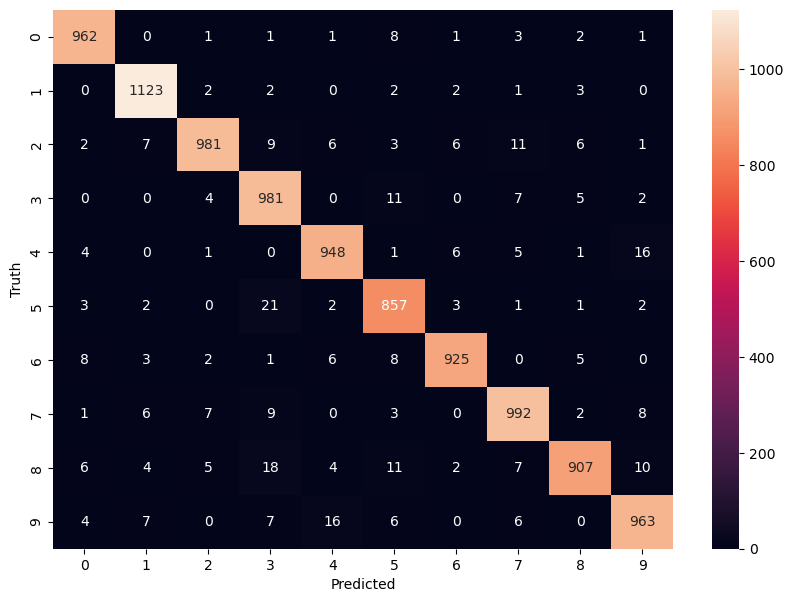

In [197]:
get_cm(predictions)

Label		:  8
Prediction	:  8


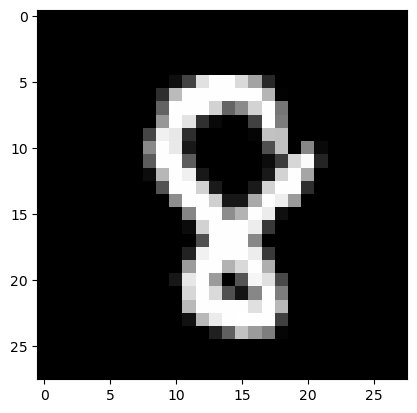

Label		:  9
Prediction	:  9


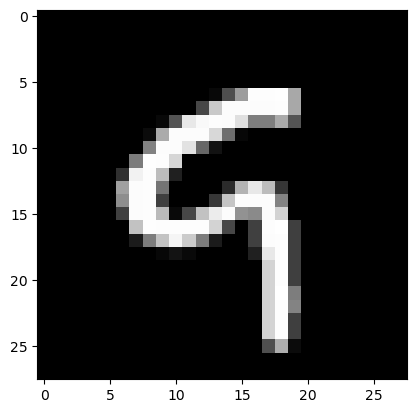

Label		:  1
Prediction	:  1


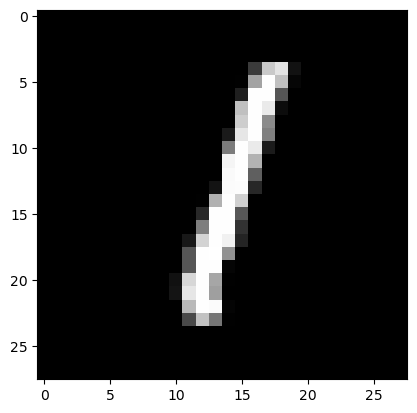

Label		:  1
Prediction	:  1


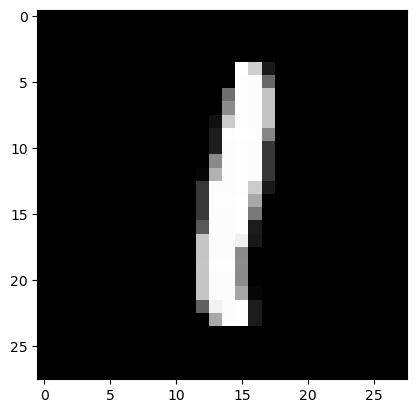

Label		:  3
Prediction	:  3


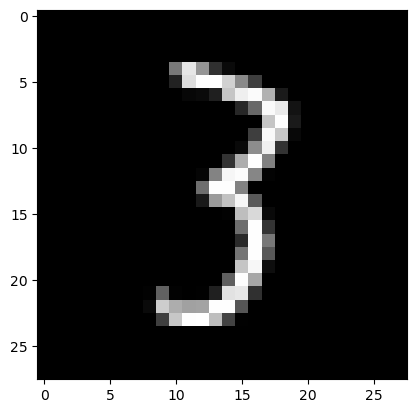

In [199]:
show(5, predictions)